<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#1.-Meet-and-Greet-Data" data-toc-modified-id="1.-Meet-and-Greet-Data-1">1. Meet and Greet Data</a></span></li><li><span><a href="#2.-Data-Cleaning:-Correcting,-Completing,-Creating,-and-Converting" data-toc-modified-id="2.-Data-Cleaning:-Correcting,-Completing,-Creating,-and-Converting-2">2. Data Cleaning: Correcting, Completing, Creating, and Converting</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#2.1.-Correcting-and-Completing" data-toc-modified-id="2.1.-Correcting-and-Completing-2.0.1">2.1. Correcting and Completing</a></span></li><li><span><a href="#2.2-Creating-and-Converting" data-toc-modified-id="2.2-Creating-and-Converting-2.0.2">2.2 Creating and Converting</a></span></li></ul></li></ul></li><li><span><a href="#3.-Check-feature-correlations-with-the-target-variable" data-toc-modified-id="3.-Check-feature-correlations-with-the-target-variable-3">3. Check feature correlations with the target variable</a></span></li><li><span><a href="#4.-Creat-model" data-toc-modified-id="4.-Creat-model-4">4. Creat model</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#4.1-Feature-Selection" data-toc-modified-id="4.1-Feature-Selection-4.0.1">4.1 Feature Selection</a></span></li><li><span><a href="#4.2-Fit-these-models-with-tripled-train-data" data-toc-modified-id="4.2-Fit-these-models-with-tripled-train-data-4.0.2">4.2 Fit these models with tripled train data</a></span></li><li><span><a href="#4.3-Use-VotingClassifier-to-combine-different-models" data-toc-modified-id="4.3-Use-VotingClassifier-to-combine-different-models-4.0.3">4.3 Use VotingClassifier to combine different models</a></span></li></ul></li></ul></li><li><span><a href="#5-Predict-and-output-the-result" data-toc-modified-id="5-Predict-and-output-the-result-5">5 Predict and output the result</a></span></li></ul></div>

# 1. Meet and Greet Data

In [82]:
#import pandas and numpy for data processing, import matplotlib for visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
#read in data and reveal the detailed information
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [84]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Data Cleaning: Correcting, Completing, Creating, and Converting
### 2.1. Correcting and Completing

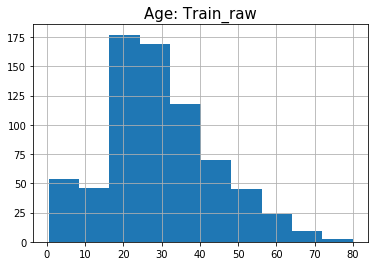

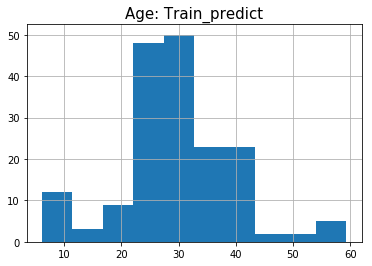

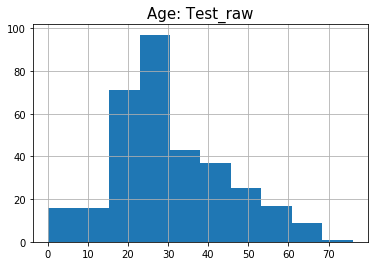

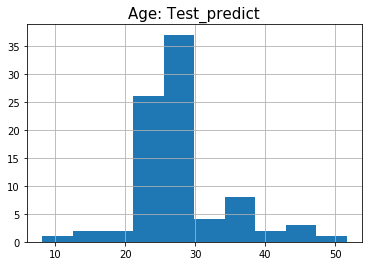

In [85]:
#using randomforest model to predict the missing ages
from sklearn.ensemble import RandomForestRegressor

def age_predict(dataset):
    
    if any(dataset['Fare'].isnull()):
        dataset.loc[dataset.Fare.isnull(),'Fare'] = dataset['Fare'].dropna().median()
    
    if 'Survived' in dataset.columns:
        age_data = dataset.loc[:,['Age','Survived','Pclass','SibSp','Parch','Fare']]
        title_raw = 'Age: Train_raw'
        title_predict = 'Age: Train_predict'
    else:
        age_data = dataset.loc[:,['Age','Pclass','SibSp','Parch','Fare']]
        title_raw = 'Age: Test_raw'
        title_predict = 'Age: Test_predict'
                
    age_train = age_data.loc[dataset.Age.notnull(),:]
    plt.figure()
    age_train.Age.hist()
    title1 = ['Train_raw','Test_raw']
    plt.title(title_raw,size = 15)
    age_predict = age_data.loc[dataset.Age.isnull(),:]
    rf = RandomForestRegressor(random_state=0, n_estimators=100)
    rf.fit(age_train.values[:,1:], age_train.values[:,0])
    age_hat = rf.predict(age_predict.values[:,1:])
    dataset.loc[dataset.Age.isnull(), 'Age'] = age_hat
    plt.figure()
    pd.Series(age_hat).hist()
    plt.title(title_predict,size = 15)
    dataset['Age'] = dataset.Age.astype(int)
    
    return dataset

data_train = age_predict(data_train)
data_test = age_predict(data_test)

From the distribution charts, we can see that the raw data and predicted data are subjected to the same distribution, indicating the predicting method is reasonable. 

### 2.2 Creating and Converting

In [86]:
#Data processing:
##concat data_train and data_test into data_all so that they can be processed together.
data_all = pd.concat([data_train.drop('Survived', axis = 1),data_test],ignore_index=True)

##use the mode number of feature 'Embarked' to fill the missing values and convert them into categorical type.
data_all.loc[data_all.Embarked.isnull(), 'Embarked'] = 'S'
data_all.Embarked = data_all.Embarked.map({'S':0, 'C':1, 'Q':2}).astype(int)

##creating a new feature 'Family_size' from 'SibSP' and 'Parch'.
data_all['Family_size'] = data_all.SibSp+data_all.Parch+1

##creating a new feature 'Is_alone' from 'Family_size'.
data_all['Is_alone'] = data_all.Family_size.apply(lambda x:1 if x==1 else 0)

##converting feature 'Cabin' into categorical type with 0 indicating missing values and 1 indicating non-missing values.
data_all.loc[data_all.Cabin.notnull(),'Cabin'] = 1
data_all.loc[data_all.Cabin.isnull(),'Cabin'] = 0
data_all['Cabin'] = data_all.Cabin.astype(int)

##creating a new feature 'Name_length' from feature 'Name'
data_all['Name_len'] = data_all.Name.apply(len)

##extract feature 'Title' from feature 'name' and map them into 5 categories.
data_all['Title'] = data_all.Name.str.extract('.+,(.+?)\..+').str.strip()
data_all['Title'] = data_all['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data_all['Title'] = data_all['Title'].replace('Mlle', 'Miss')
data_all['Title'] = data_all['Title'].replace('Ms', 'Miss')
data_all['Title'] = data_all['Title'].replace('Mme', 'Mrs')
data_all['Title'] = data_all.Title.map({'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Rare':4})

##creating feature 'Mother with child' from feature 'Title' and 'Parch':
def findMrs(name):
    if 'Mrs' in name:
        return True
    else:
        return False

criterion = data_all.Name.apply(findMrs)
data_all['Mother'] = 0
data_all.loc[criterion&(data_all.Parch!=0),'Mother'] = 1

##merge 'Sex' and 'Age' into one feature, seperate them into 3 categories: children, adult women and adult men.
data_all.loc[data_all.Age<12, 'Sex'] = 0
data_all.loc[(data_all.Age>=12)&(data_all.Sex == 'male'),'Sex'] = 1
data_all.loc[(data_all.Age>=12)&(data_all.Sex == 'female'),'Sex'] = 2
data_all.Sex = data_all.Sex.map(int)

##Sex is a dominating feature when doing classification. The model tend to classify all the males to not survived and all the females to survived.
##While in a family (sharing the same surname), if one male is survived, then probably all the members in this family are survived.
##According to this, we create two new features named 'perishing_female_surnames' and 'surviving_male_surnames'.
data_train['Surname'] = data_train.Name.apply(lambda x:x.split(',')[0])
data_all['Surname'] = data_all.Name.apply(lambda x:x.split(',')[0])
data_train.loc[(data_train.Age>=12)&(data_train.Sex == 'male'),'Sex'] = 1
data_train.loc[(data_train.Age>=12)&(data_train.Sex == 'female'),'Sex'] = 2
data_train['Family_size'] = data_train.SibSp+data_train.Parch+1
perishing_female_surnames = list(set(data_train[(data_train.Sex == 2)&(data_train.Survived == 0)&(data_train.Family_size>1)]['Surname'].values))
surviving_male_surnames = list(set(data_train[(data_train.Sex == 1)&(data_train.Survived == 1)&(data_train.Family_size>1)]['Surname'].values))
data_all['p_f_surnames'] = np.where(data_all.Surname.isin(perishing_female_surnames),1,0)
data_all['s_m_surnames'] = np.where(data_all.Surname.isin(surviving_male_surnames),1,0)

##To avoid overfitting, we discretize 'Fare' and 'Name_len' variables into equal-sized buckets based on sample quantiles.
data_all.loc[data_all.Fare<=7.85,"Fare"] = 0
data_all.loc[(data_all.Fare>7.85)&(data_all.Fare<=10.5),"Fare"] = 1
data_all.loc[(data_all.Fare>10.5)&(data_all.Fare<=21.68),"Fare"] = 2
data_all.loc[(data_all.Fare>21.68)&(data_all.Fare<=39.69),"Fare"] = 3
data_all.loc[data_all.Fare>39.69,"Fare"] = 4
data_all.Fare = data_all.Fare.map(int)

name_len_bin = pd.qcut(data_all.Name_len.values, 3)
data_all.loc[data_all.Name_len<=22,"Name_len"] = 0
data_all.loc[(data_all.Name_len>22)&(data_all.Name_len<=28),"Name_len"] = 1
data_all.loc[data_all.Name_len>28,"Name_len"] = 2

##Drop redundant features.
data_all = data_all.drop(['Age','PassengerId','Ticket','Name','Surname'], axis = 1)
data_all.head()

d:\programs\python2.7\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Family_size,Is_alone,Name_len,Title,Mother,p_f_surnames,s_m_surnames
0,3,1,1,0,0,0,0,2,0,1,0,0,0,0
1,1,2,1,0,4,1,1,2,0,2,2,0,0,0
2,3,2,0,0,1,0,0,1,1,0,1,0,0,0
3,1,2,1,0,4,1,0,2,0,2,2,0,0,0
4,3,1,0,0,1,0,0,1,1,1,0,0,0,0


# 3. Check feature correlations with the target variable

In [87]:
#calculate the correlation coefficient between target variable and different features:
data_coef = data_all.iloc[:len(data_train),:].assign(Survived = data_train.Survived)
coef = np.corrcoef(data_coef.values, rowvar=False)[-1][:-1]
coef = pd.DataFrame({'Coef':coef,'Features':data_all.columns})
coef

,Coef,Features
0,-0.338481,Pclass
1,0.382591,Sex
2,-0.035322,SibSp
3,0.081629,Parch
4,0.318024,Fare
5,0.316912,Cabin
6,0.106811,Embarked
7,0.016639,Family_size
8,-0.203367,Is_alone
9,0.282913,Name_len


# 4. Creat model
### 4.1 Feature Selection

In [88]:
#import sklearn libararies
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve

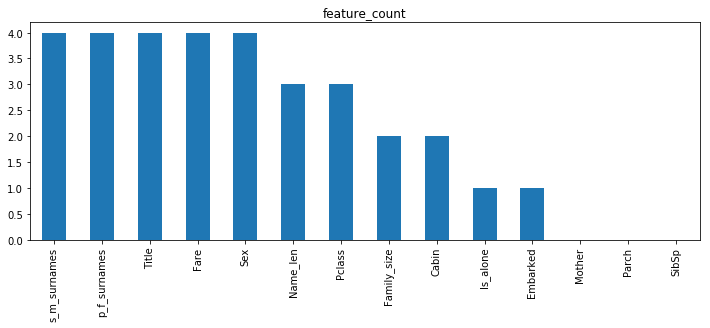

In [89]:
#Fit 4 models with raw data and get their feature importances respectively.
#Count the times that a feature appears in the top 8 most important features of the models.
#Plot the times, 4 means this feature is import in all 4 models.
models = [RandomForestClassifier(), GradientBoostingClassifier(), XGBClassifier(), ExtraTreesClassifier()]
feat_count = pd.Series([0]*len(data_all.columns), index = data_all.columns)

for i in range(len(models)):
    clf = models[i]
    clf.fit(data_all.iloc[:len(data_train),:],data_train.Survived)
    feat_imp = pd.Series(clf.feature_importances_, index = data_all.columns).sort_values(ascending=False)
    for j in range(8):
        feat_count[feat_imp.index[j]] = feat_count[feat_imp.index[j]] + 1

feat_count = feat_count.sort_values(ascending=False)
feat_count.plot(kind='bar', title='feature_count', figsize=(12,4))

### 4.2 Fit these models with tripled train data

In [90]:
#Choose first 9 features and triple train data.
X = data_all.loc[:,feat_count.index[:9]]
X_train = X.iloc[:len(data_train),:]
X_train = pd.concat([X_train, X_train, X_train],ignore_index=True)
Y_train = pd.concat([data_train.Survived, data_train.Survived, data_train.Survived],ignore_index=True)
X_test = X.iloc[len(data_train):,:]

model_name = []
feature_import = []
models = []
train_sizes = []
train_score_ave = []
valid_score_ave = []

def gsmodel(clf):
    clf.fit(X_train,Y_train)
    
    #obtain the model's learning curves
    train_size, train_scores, valid_scores = learning_curve(clf, X_train, Y_train, train_sizes=np.arange(0.1,1.,0.1), cv=5, n_jobs = 8)
    
    #put all the variables into lists
    if clf.__class__.__name__ in model_name:
        ind = model_name.index(clf.__class__.__name__)
        models[ind] = clf
        feature_import[ind] = pd.Series(clf.feature_importances_, index = feat_count.index[:9]).sort_values(ascending=False)
        train_score_ave[ind] = np.average(train_scores, axis = 1)
        valid_score_ave[ind] = np.average(valid_scores, axis = 1)
        train_sizes[ind] = train_size
    else:
        model_name.append(clf.__class__.__name__)
        models.append(clf)
        feature_import.append(pd.Series(clf.feature_importances_, index = feat_imp.index[:9]).sort_values(ascending=False))
        train_score_ave.append(np.average(train_scores, axis = 1))
        valid_score_ave.append(np.average(valid_scores, axis = 1))
        train_sizes.append(train_size)

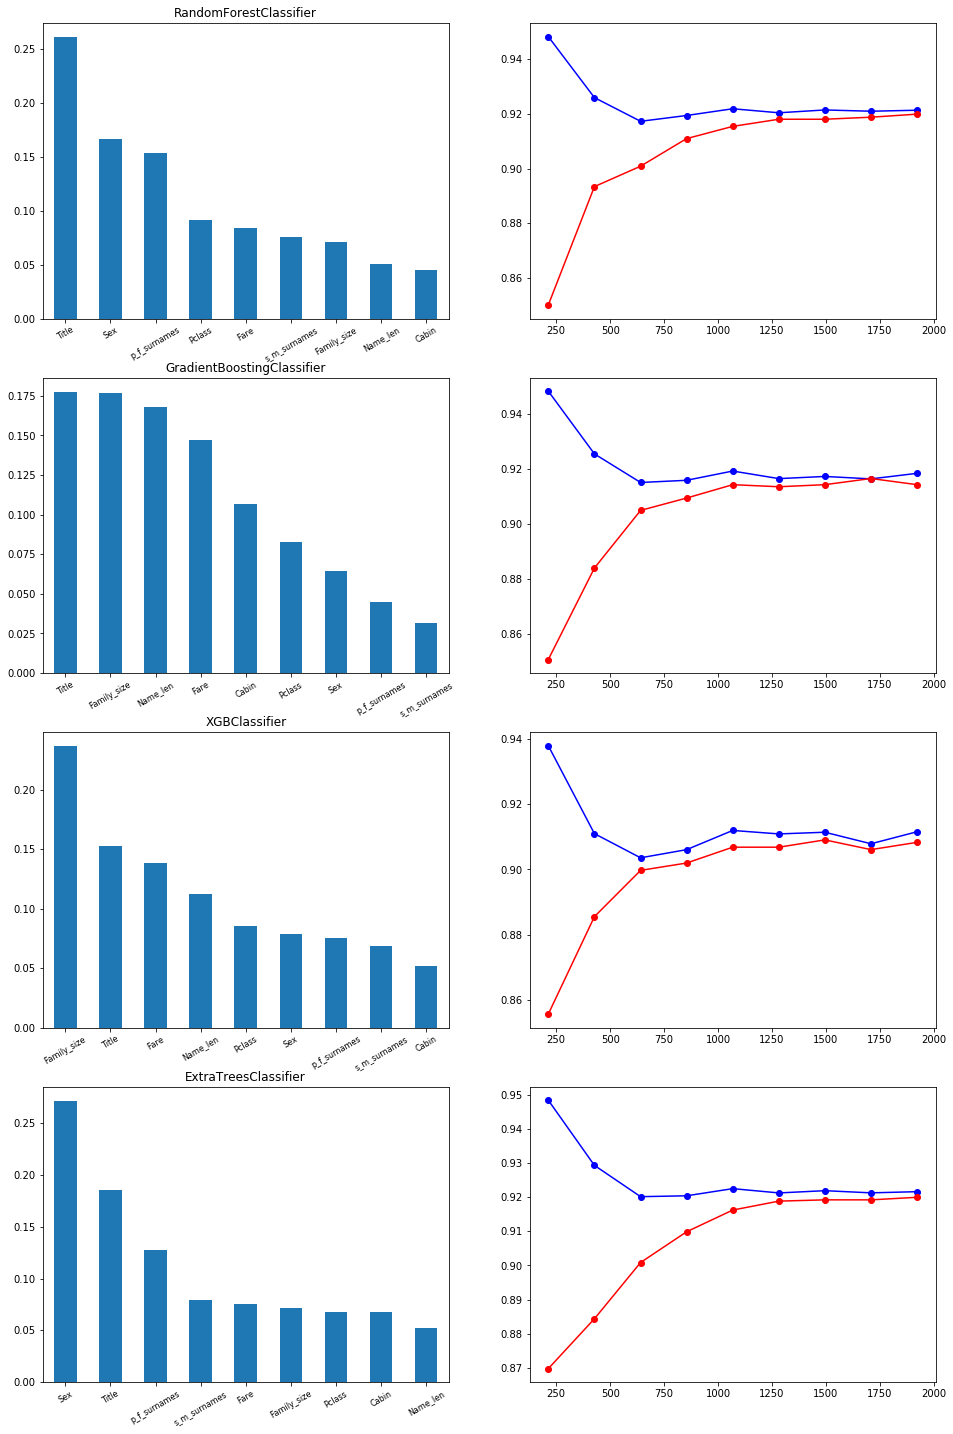

In [92]:
#Draw the models' features importance and learning curves to make sure that the model has not been overfitted.
gsmodel(RandomForestClassifier(random_state = 11, n_jobs = 8))
gsmodel(GradientBoostingClassifier(n_estimators=500, random_state = 13))
gsmodel(XGBClassifier(n_estimators=500, random_state = 13))
gsmodel(ExtraTreesClassifier(random_state = 11, n_jobs = 8))

fig=plt.figure()
plot_num = [[421,422],[423,424],[425,426],[427,428]]
for i in range(len(models)):
    ax1=fig.add_subplot(plot_num[i][0])
    titlestr = model_name[i]
    feature_import[i].plot(kind='bar', title=titlestr, figsize=(16,25))
    ax1.xaxis.set_tick_params(rotation=30, labelsize=8)
    
    ax2 = fig.add_subplot(plot_num[i][1])
    ax2.plot(train_sizes[i], train_score_ave[i], 'o-', color="b", label=u"train score")
    ax2.plot(train_sizes[i], valid_score_ave[i], 'o-', color="r", label=u"testCV score")

For all these models, the validation score and the training score converge to a value after 1500 training examples involved, indicating that the models do benifit from more training data.

### 4.3 Use VotingClassifier to combine different models

In [79]:
#Use the average predicted probabilities (soft vote) to predict the class labels.
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=zip(model_name,models), voting='soft')
eclf.fit(X_train,Y_train)

VotingClassifier(estimators=[('RandomForestClassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2...estimators=10, n_jobs=8,
           oob_score=False, random_state=11, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

# 5 Predict and output the result

In [80]:
result = eclf.predict(X_test)

result = pd.DataFrame({'PassengerId':data_test.PassengerId.values,'Survived':result})
result.to_csv('result.csv', index = False)